<div style='text-align: center;'>
    <h1><b>CE235 Project:  Artificial Intelligence and Data Science</h1>
</div>

**<h1>📊Introduction:</h1>**

Credit card fraud is a significant worry for financial institutions and consumers alike, with the potential to result in huge financial losses and destroy trust in the payment ecosystem. A dataset of credit card transactions done by European cardholders in 2023 has been made accessible for examination in an attempt to address this problem. With the identities of the cards meticulously anonymised to guarantee privacy and security, this dataset contains around 550,000 records.
This dataset's main goal is to be a useful tool for creating and improving fraud detection models and algorithms. Researchers and data scientists can investigate and apply novel approaches for detecting potentially fraudulent transactions by utilizing the anonymized transaction attributes, such as the V1-V28 features that represent different transaction characteristics, time, location, transaction amount, and a binary label indicating fraudulent or non-fraudulent status.
The purpose of the report is to offer analysis and insights that can support continuous efforts to improve credit card fraud detection systems. Potential use cases will be investigated, include developing machine learning models to identify and stop credit card fraud, looking into correlations between fraud and various merchant categories, and identifying patterns in various transaction types that indicate a higher risk of fraudulent behavior.
In addition to going over the methodology and approaches that can be used for analysis, this study will also explore the major elements of the dataset with the ultimate goal of providing useful insights that support the continuous advancement of fraud detection in the context of credit card transactions.

**Importing the libraries**

In [1]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**<h1>📊Data Collection and Preprocessing:</h1>**

**<h3>About Dataset</h3>**
**Dataset Overview:**
This dataset encompasses credit card transactions carried out by European cardholders during the year 2023. It includes a vast collection of over 550,000 records, with meticulous anonymization measures taken to safeguard the privacy of cardholders. The primary intent behind curating this dataset is to support the advancement of fraud detection algorithms and models geared towards pinpointing potentially fraudulent transactions.

**Key Attributes:**
- id: A distinctive identifier for each transaction
- V1-V28: Features subjected to anonymization, representing diverse transaction attributes such as time, location, etc.
- Amount: Denotes the transaction amount
- Class: Binary label signifying whether the transaction is fraudulent (1) or not (0)

**Potential Applications:**
1. Credit Card Fraud Detection: Develop machine learning models to identify and prevent credit card fraud by detecting suspicious transactions using the provided anonymized features.
2. Merchant Category Analysis: Investigate the correlation between different merchant categories and the occurrence of fraud.
3. Transaction Type Analysis: Explore whether certain types of transactions exhibit a higher susceptibility to fraudulent activities than others.

In [2]:
df = pd.read_csv("creditcard_2023.csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [3]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


**Observations**<br>

*We have 568630 Rows of observations having 31 columns.<br>
*'Class' is our Output feature indicating whether the transaction is fraudulent (1) or not (0).<br>
*No missing values observed in our Dataset.<br>
*dtype of all the features looks perfect.<br>

In [5]:
# number of rows and columns in the dataset
df.shape

(568630, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Lets check for duplicates if any
df.duplicated().any()

False

In [10]:
# checking the distribution of Target Variable
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

**Observations** <br>
    *No missing values.<br>
    *No duplicates.<br>
    *dtype also looks fine.

In [11]:
#Removing irrelevant features
df=df.drop(['id'],axis=1)

In [12]:
#Define features and the target variable

X=df.drop(['Class'],axis=1)
y=df['Class']

**<h1>📊Exploratory Data Analysis & Data Visualization:</h1>**

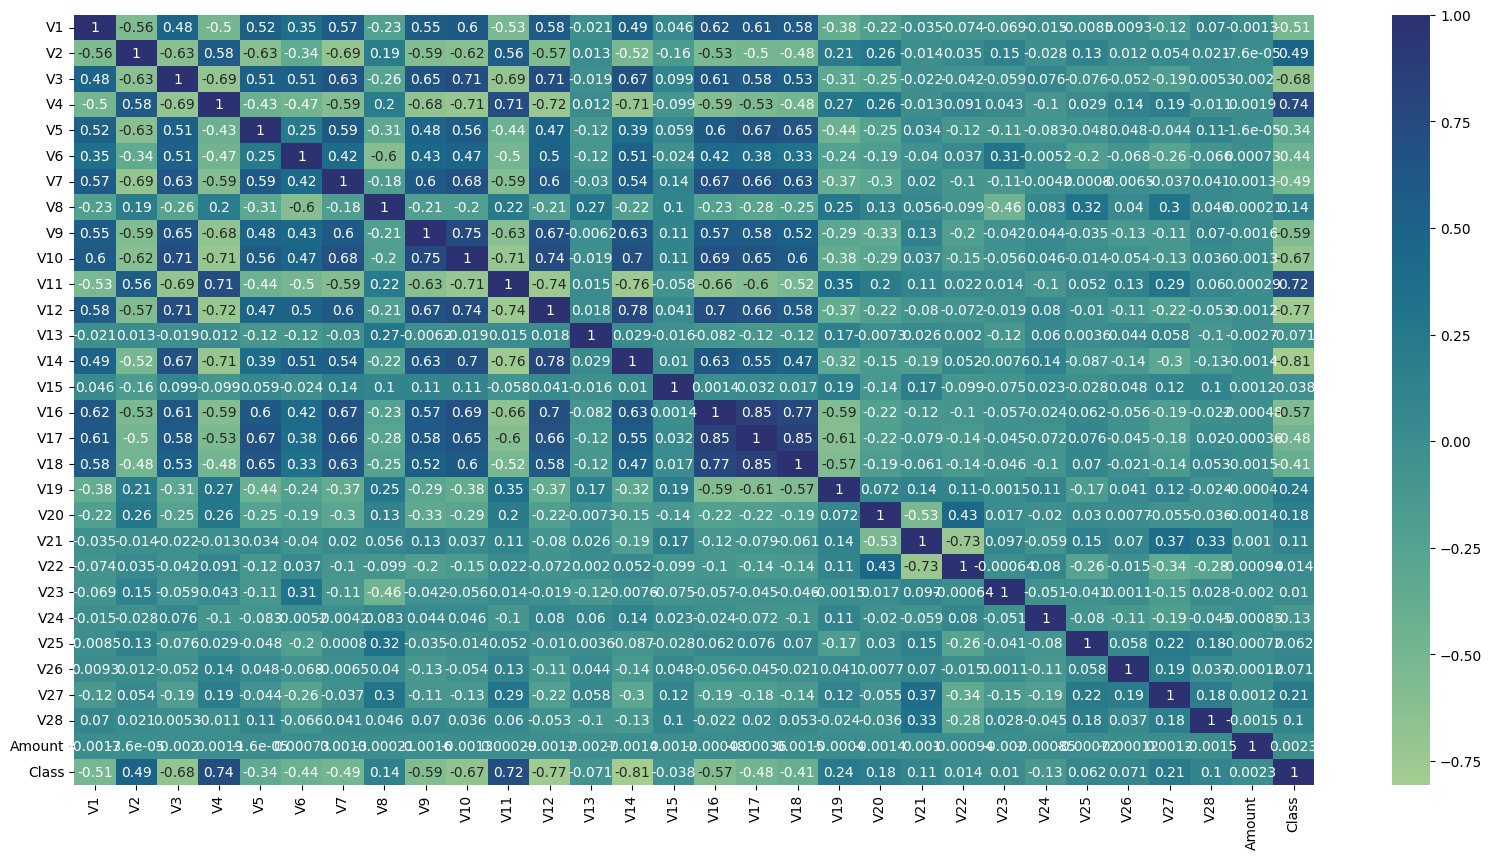

In [13]:
paper = plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),cmap='crest',annot=True)
plt.show()

**Observations**
<br>
Few features have high co-relation among different features.<br>
V17 and V18 are higly co-related.<br>
V16 and V17 are higly co-related.<br>
V14 has a negative corelation with V4.<br>
V12 is also negatively co-related with V10 and V11.<br>
V11 is ngetively co-related with V10 and positvely with V4.<br>
V3 is positevely co-related with V10 and V12.<br>
V9 and V10 are also positively co-related.<br>

In [14]:
df.skew()

V1        -0.083417
V2        -1.397952
V3         0.014622
V4        -0.044169
V5         1.506414
V6        -0.201611
V7        19.026866
V8         0.299972
V9         0.171057
V10        0.740414
V11       -0.020891
V12        0.066759
V13        0.014906
V14        0.207835
V15        0.011233
V16        0.266407
V17        0.373061
V18        0.129191
V19       -0.010171
V20       -1.556460
V21       -0.108983
V22        0.318529
V23       -0.099687
V24        0.066090
V25        0.023008
V26       -0.018959
V27        2.755452
V28        1.724978
Amount     0.001656
Class      0.000000
dtype: float64

**Observations**
<br>
Features like V1,V10,V23 are highly negatively skewed.<br>

<Axes: >

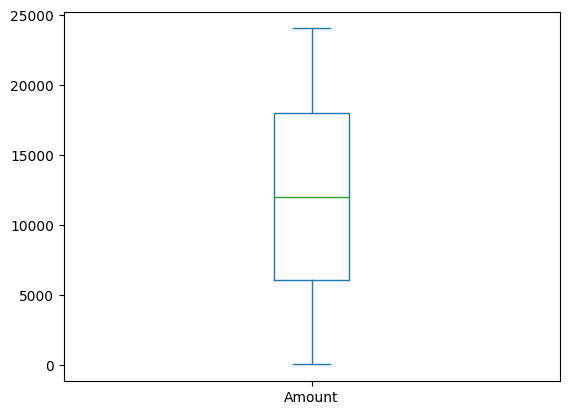

In [15]:
df['Amount'].plot.box()

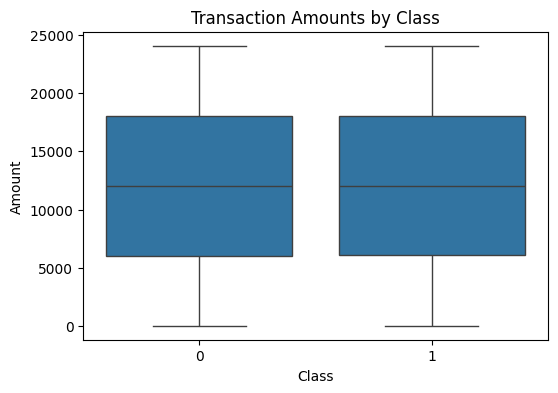

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amounts by Class')
plt.show()

C:\Users\Yuvraj\AppData\Local\Temp\ipykernel_5488\522490953.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Amount'], shade=True)


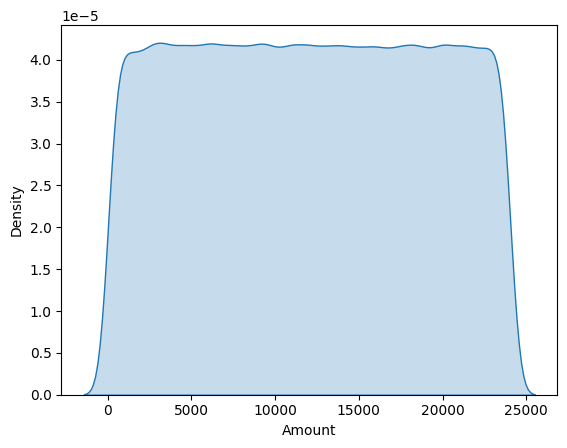

In [17]:
sns.kdeplot(data=df['Amount'], shade=True)
plt.show()

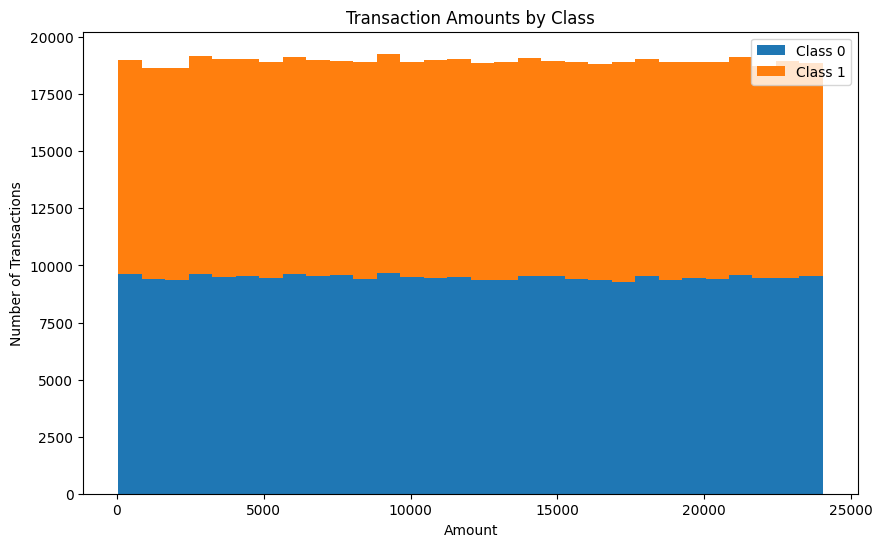

In [18]:
# as above, but broken down by target
class_0 = df[df['Class']==0]['Amount']
class_1 = df[df['Class']==1]['Amount']

plt.figure(figsize=(10,6))

plt.hist([class_0, class_1], bins=30, stacked=True, label=['Class 0', 'Class 1'])

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title('Transaction Amounts by Class')
plt.legend()

plt.show()

**Observations**
<br>
Amount is fairly Normally distributed.

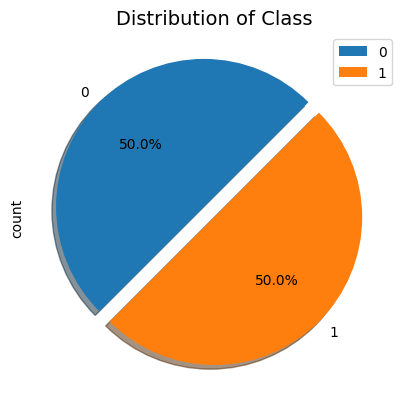

In [19]:
#Lets look at our Output feature
df['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

**Observations**
<br>
Our output feature is equally balanced.

**<h1>📊Data Standardization</h1>**

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X)
X_std_data = scaler.transform(X)

**Data Splitting**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std_data, y, test_size=0.2, random_state = 2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(568630, 29) (454904, 29) (113726, 29)


**<h1>📊Creating different Machine Learning Models</h1>**

**<h3>Logistic Regression</h3>**<br>
**Principle**<br>
Logistic regression is a statistical method used for predicting the probability of a binary outcome. It's a type of regression analysis that is well-suited for predicting the probability of an event occurring based on one or more predictor variables. The outcome is typically binary, meaning it has two possible classes (e.g., 0 or 1, true or false, yes or no). The principle behind logistic regression lies in transforming the linear combination of input features into a probability using the logistic function, also known as the sigmoid function. This function ensures that the output of the regression model falls between 0 and 1, representing probabilities.

**Methodology**<br>
Data Collection:
Gather a dataset with binary outcome variables and predictor variables.

Data Preprocessing:
Handle missing data.
Encode categorical variables.
Standardize or normalize numerical variables.

Model Training:
Initialize weights and biases.
Use an optimization algorithm (usually gradient descent) to minimize the logistic loss function.
Update weights and biases iteratively to improve the model.

Model Evaluation:
Use metrics like accuracy, precision, recall, and F1 score.
Validate the model on a separate dataset to assess its generalization performance.

Prediction:
Once the model is trained, use it to predict the probability of the event for new data.


**Algorithm**<br>
The logistic regression algorithm involves several key steps:

Hypothesis:
the predicted probability that y=1 given x and parameters θ.

Cost Function: 
This is the logistic loss function, which measures the difference between the predicted probability and the actual outcome.

Gradient Descent: 
Update weights and biases iteratively to minimize the cost function.
α is the learning rate.

Convergence:
Iterate until the cost function converges to a minimum or a predetermined number of iterations is reached.

In [24]:
class Logistic_Regression():

  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y


    # implementing Gradient Descent for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)
    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))


    # derivaties
    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))
    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary
  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

**<h3>SVM Classifier</h3>**<br>
**Principle**<br>
Support Vector Machines are a class of supervised learning algorithms used for classification and regression analysis. The basic principle of SVM is to find the hyperplane that best separates different classes in the feature space. The "support vectors" are the data points that lie closest to the decision boundary (hyperplane), influencing its position and orientation.

**Methodology**<br>
Data Collection:
Gather a dataset with labeled examples for training the classifier.

Data Preprocessing:
Standardize or normalize the feature values.
Handle missing data.
Encode categorical variables if necessary.

Feature Selection:
Choose relevant features that contribute to the classification task.

Model Training:
SVM aims to find the hyperplane with the maximum margin between classes.
The decision boundary is determined by the support vectors.
Use a kernel function (linear, polynomial, radial basis function, etc.) to transform the data into a higher-dimensional space if necessary.

Model Evaluation:
Assess the performance of the trained model using metrics like accuracy, precision, recall, and F1 score.
Validate the model on a separate dataset to ensure generalization.

Parameter Tuning:
Adjust hyperparameters such as the regularization parameter (C) and the kernel parameters to optimize the model.


**Algorithm**<br>
The decision boundary is a hyperplane that maximizes the margin between classes.
The objective is to find w and b in the equation w⋅x−b=0, where w is the weight vector and b is the bias term.




In [25]:
class SVM_classifier():

  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter



  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)

    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):
        dw = 2 * self.lambda_parameter * self.w
        db = 0
      else:
        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]

      # updating the weights & bias using gradient descent
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    predicted_labels = np.sign(output)
    y_hat = np.where(predicted_labels <= -1, 0, 1)
    return y_hat

**<h3>K-Nearest Neighbors Classifier</h3>**<br>
**Principle**<br>
Support Vector Machines are a class of supervised learning algorithms used for classification and regression analysis. The basic principle of SVM is to find the hyperplane that best separates different classes in the feature space. The "support vectors" are the data points that lie closest to the decision boundary (hyperplane), influencing its position and orientation.

**Methodology**<br>
Data Collection:
Gather a dataset with labeled examples for training and testing.

Data Preprocessing:
Handle missing data.
Normalize or standardize the feature values.
Encode categorical variables if necessary.

Feature Selection:
Identify relevant features that contribute to the classification task.

Model Training:
Store the entire training dataset in memory.
During prediction, calculate the distance between the input instance and all instances in the training set.

Prediction:
Identify the k-nearest neighbors based on distance.
Assign the class label based on the majority class among the k-neighbors.

Model Evaluation:
Assess the model's performance using metrics like accuracy, precision, recall, and F1 score.
Validate the model on a separate dataset to ensure generalization.


**Algorithm**<br>
Euclidean Distance:
Commonly used to measure the distance between two instances in the feature space.

Manhattan Distance:
An alternative distance metric calculated as the sum of the absolute differences between the coordinates.

Choosing k:
The value of k is a crucial parameter.
A small k may lead to noise sensitivity, while a large k may result in over-smoothing.
Choose an odd value of k to avoid ties in binary classification.

Weighted k-NN:
Assign different weights to neighbors based on their distance.
Closer neighbors have a higher influence on the prediction.







In [26]:
class KNN_Classifier():

  # initiating the parameters
  def __init__(self, distance_metric):

    self.distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metric(self,training_data_point, test_data_point):

    if (self.distance_metric == 'euclidean'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)
      return euclidean_dist


    elif (self.distance_metric == 'manhattan'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])
      
      manhattan_dist = dist
      return manhattan_dist

  # getting the nearest neighbors
  def nearest_neighbors(self,X_train, test_data, k):

    distance_list = []

    for training_data in X_train:
      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))

    distance_list.sort(key=lambda x: x[1])

    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  # predict the class of the new data point:
  def predict(self,X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)

    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)
    return predicted_class

**<h3>Decision Tree Classifier</h3>**<br>
**Principle**<br>
Decision trees are a popular supervised machine learning algorithm used for both classification and regression tasks. The principle behind decision trees is to recursively split the dataset based on the most significant feature at each node, creating a tree-like structure of decisions. These decisions lead to the final prediction or classification at the leaf nodes.

**Methodology**<br>
Data Collection:
Gather a labeled dataset suitable for training a decision tree.

Data Preprocessing:
Handle missing data.
Encode categorical variables.
Normalize or standardize features if necessary.

Feature Selection:
Identify features that contribute significantly to the classification or regression task.

Model Training:
Select the most informative feature to split the data at each node.
Recursively build the tree until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf).
Assign class labels or predict values at the leaf nodes.

Model Evaluation:
Assess the performance of the trained model using metrics like accuracy, precision, recall, and F1 score.
Validate the model on a separate dataset to ensure generalization.


**Algorithm**<br>
1)Decision Tree Splitting Criteria:

Classification:

Gini impurity: Measures the probability of misclassifying an instance.


Entropy: Measures the level of impurity in a set.

Information gain: Measures the reduction in entropy after a split.

Regression:

Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values.

2)Tree Growing:
Start with the entire dataset.
Choose the best feature to split on.
Recursively repeat the process for each subset until a stopping criterion is met.

3)Pruning:
Stop growing the tree based on pre-defined conditions (e.g., maximum depth, minimum samples per leaf).
Post-pruning (Pruning after tree construction):
Remove branches that do not contribute significantly to the model's predictive power.

4)Handling Categorical Variables:
Decision trees can handle categorical variables directly by creating binary splits for each category.







In [27]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes, counts = np.unique(y, return_counts=True)

        if len(unique_classes) == 1:
            return unique_classes[0]

        if depth >= self.max_depth:
            return unique_classes[np.argmax(counts)]

        # Find the best split
        best_gini = 1.0
        best_feature = None
        best_threshold = None

        for feature in range(n_features):
            unique_values = np.unique(X[:, feature])
            for threshold in unique_values:
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                gini_left = 1.0 - (np.sum((y[left_mask] == unique_classes[0]) * (y[left_mask] != c) for c in unique_classes)).all()
                gini_right = 1.0 - (np.sum((y[right_mask] == unique_classes[0]) * (y[right_mask] != c) for c in unique_classes)).all()

                gini = (np.sum(left_mask) / n_samples) * gini_left + (np.sum(right_mask) / n_samples) * gini_right

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        if best_gini == 1.0:
            return unique_classes[np.argmax(counts)]

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold

        left_subtree = self.fit(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.fit(X[right_mask], y[right_mask], depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        node = self.tree
        while isinstance(node, tuple):
            feature, threshold, left_subtree, right_subtree = node
            if x[feature] <= threshold:
                node = left_subtree
            else:
                node = right_subtree
        return node


**<h1>📊Machine Learning Model Selection & Training:</h1>**

**Model Selection**

In [28]:
LR = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)
SVM = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

**Model Training**

In [29]:
LR.fit(X_train, Y_train)
SVM.fit(X_train, Y_train)

In [30]:
# Make predictions on the test set
y_train_pred_lr = LR.predict(X_train)
y_pred_lr = LR.predict(X_test)
y_train_pred_svc = SVM.predict(X_train)
y_pred_svc = SVM.predict(X_test)

**<h1>📊Model Evaluation:</h1>**

In [31]:
#Lets define a function for Checking Model Accuracy,Classification Report and Confusion Matrix
def model_eval(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    conf_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)

    print('Model Accuracy is: ', round(acc_score, 2))

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        conf_matrix, annot=True, fmt='d', cmap='cividis', linewidths=0.4, square=True, cbar=True,
        xticklabels=["0", "1"],
        yticklabels=["0", "1"]
    )
    plt.xlabel('Predicted', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=14, fontweight='bold')
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
    plt.yticks(rotation=360)
    plt.show()

    print(clas_rep)

**For Logistic Regression**

-------Training Accuracy---------
Model Accuracy is:  0.94


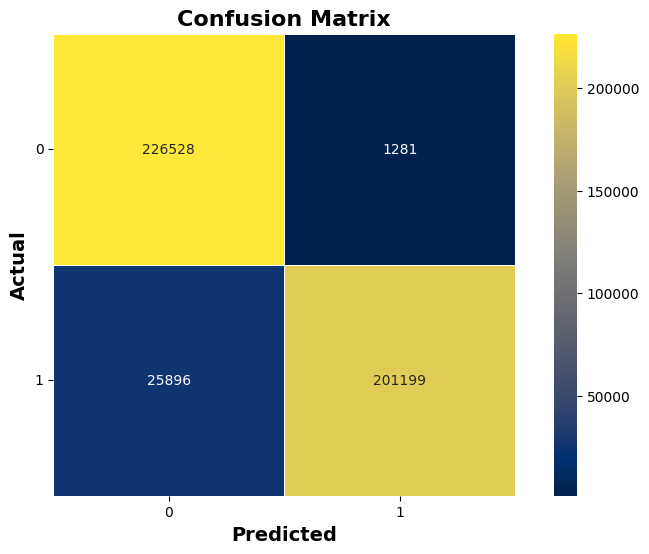

              precision    recall  f1-score   support

           0       0.90      0.99      0.94    227809
           1       0.99      0.89      0.94    227095

    accuracy                           0.94    454904
   macro avg       0.95      0.94      0.94    454904
weighted avg       0.95      0.94      0.94    454904



In [32]:
print('-------Training Accuracy---------')
model_eval(Y_train, y_train_pred_lr)

-------Testing Accuracy---------
Model Accuracy is:  0.94


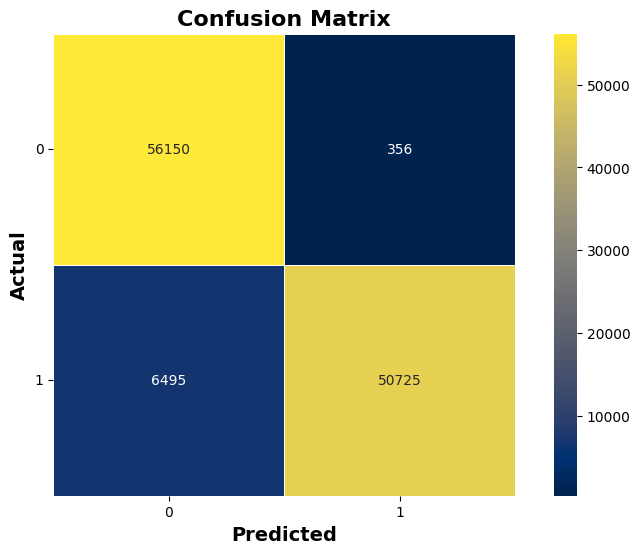

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     56506
           1       0.99      0.89      0.94     57220

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



In [33]:
print('-------Testing Accuracy---------')
model_eval(Y_test, y_pred_lr)

**For Support Vector Classifier**

-------Training Accuracy---------
Model Accuracy is:  0.96


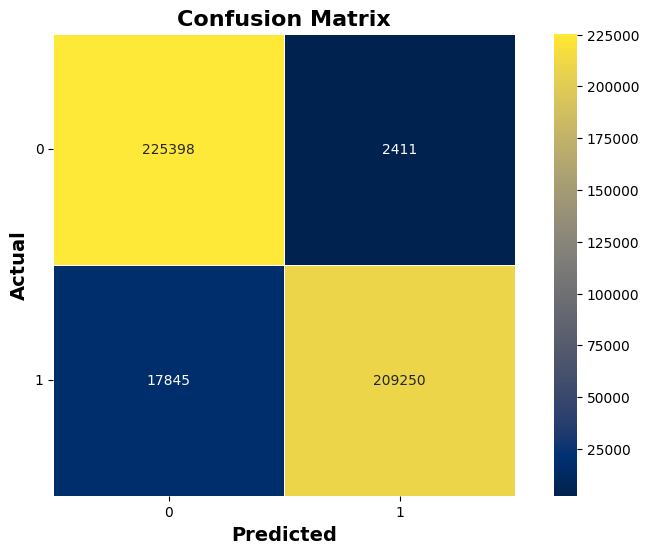

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    227809
           1       0.99      0.92      0.95    227095

    accuracy                           0.96    454904
   macro avg       0.96      0.96      0.96    454904
weighted avg       0.96      0.96      0.96    454904



In [34]:
print('-------Training Accuracy---------')
model_eval(Y_train, y_train_pred_svc)

-------Testing Accuracy---------
Model Accuracy is:  0.95


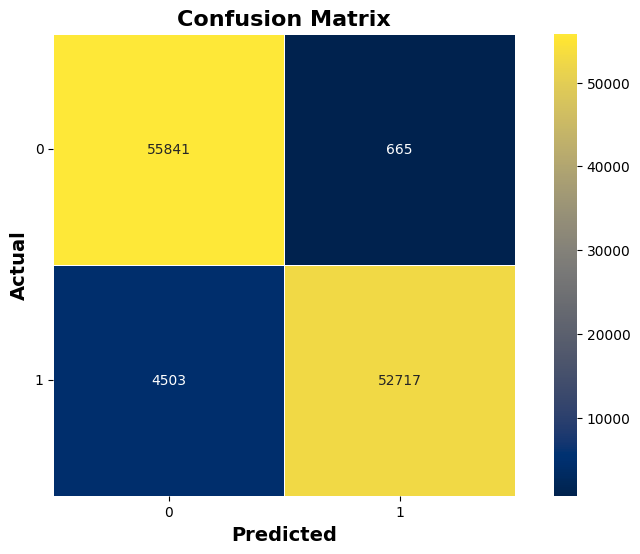

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     56506
           1       0.99      0.92      0.95     57220

    accuracy                           0.95    113726
   macro avg       0.96      0.95      0.95    113726
weighted avg       0.96      0.95      0.95    113726



In [35]:
print('-------Testing Accuracy---------')
model_eval(Y_test, y_pred_svc)

**<h1>📊Results and Interpretation::</h1>**

Support Vector Classifier (SVC)

    Testing Accuracy: 95%
    Precision:
        Class 0 (label 0): 93%
        Class 1 (label 1): 99%
    Recall:
        Class 0: 99%
        Class 1: 92%
    F1-Score:
        Class 0: 96%
        Class 1: 95%
    Class 0 Support: 56,506
    Class 1 Support: 57,220

Logistic Regression

    Testing Accuracy: 94%
    Precision:
        Class 0 (label 0): 90%
        Class 1 (label 1): 99%
    Recall:
        Class 0: 99%
        Class 1: 89%
    F1-Score:
        Class 0: 94%
        Class 1: 94%
    Class 0 Support: 56,506
    Class 1 Support: 57,220

Comparison

The Support Vector Classifier (SVC) outperforms the Logistic Regression model in terms of testing accuracy. The SVC achieved a testing accuracy of 95%, while the Logistic Regression model achieved a testing accuracy of 94%. In both models, Class 0 (label 0) shows high precision and recall, with Class 1 (label 1) having slightly different trade-offs in precision and recall.<br>

KNN & Decision Tree have more time complexity so we are unable to train them as both the models take so much time but we uploaded the whole code with explanation.

**<h1>📊Conclusion:</h1>**

Machine Learning Model Selection Project: Exploring the Performance of Different Models in Classifying Credit Cards
In this exciting study, we delved into the fascinating world of machine learning to explore how different algorithms perform in classifying credit cards based on various features. We utilized three distinct models – logistic regression, decision trees – to evaluate their effectiveness in predicting fraudulent transactions. Our findings reveal striking differences in model performance, underscoring the importance of selecting the appropriate algorithm for any given task.
Overall, our investigation serves as a testament to the power of machine learning in tackling real-world problems. By carefully evaluating the strengths and weaknesses of each algorithm, we can make informed decisions about which approach best suits our objectives. Whether dealing with credit card fraud or other areas of concern, machine learning offers us a wealth of knowledge to draw upon and a multitude of tools at our disposal.